

# Project: Investigate the 'No-show appointments' Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

"This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. ‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up."
### Question explained
- Who is the oldest patient and whether he/she show in the appointment or not ?
- What's the total number of patients male and female ?
- Which months and days did most and least patients make appointments? 
- What's the most frequent neighbourhood?
- What's the ratio of patients suffering from hipertension, diabetes, alcoholism and handicap ?
- What's the ration of male and female patients suffering from  hipertension, diabetes, alcoholism and handicap ?
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [238]:
import pandas as pd 
import numpy as np 
% matplotlib inline 
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns 
from prettytable import PrettyTable
import calendar


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [239]:
# upload data from the csv file 
data = pd.read_csv('KaggleV2-May-2016.csv')
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [240]:
# Check for the data columns types
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [241]:

data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [242]:
data.shape

(110527, 14)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [244]:
# Check for any duplicated data 
data.duplicated().sum()

0

In [245]:
# Check for any missing values in the data 
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [246]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

In [247]:
# Change  column names 
data.rename(columns = {'PatientId':'patient_id', 'AppointmentID':'appointment_id', 'Age':'age', 'Scholarship':'scholar_ship',
                      'Hipertension':'hiper_tension', 'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handicap',
                      'No-show':'no_show', 'Gender':'gender', 'ScheduledDay':'scheduled_day', 'AppointmentDay':'appointment_day', 
                      'Neighbourhood':'neighbourhood', 'SMS_received':'sms_received'}, inplace= True)


In [248]:
data.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [249]:
# Change to datetime format for columns needed
data.iloc[:, 3:5] = data.iloc[:, 3:5].apply(pd.to_datetime)

In [250]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [251]:
data.shape

(110527, 14)

In [252]:
data['handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

- The handicap column has 5 values instead of 2 that showing up even if the patient has handicap or not 

In [253]:
# Filter the columns that have values more that 1 
values = data.query('handicap >= 2')

In [254]:
values

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
946,7.282582e+13,5582483,M,2016-04-14 09:26:08,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29 10:08:48,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29 08:13:59,2016-04-29,11,ANDORINHAS,0,0,0,0,2,0,No
2213,3.423831e+09,5640766,F,2016-04-29 11:22:50,2016-04-29,29,VILA RUBIM,0,0,0,0,2,0,No
2214,2.754718e+12,5640760,M,2016-04-29 11:22:20,2016-04-29,55,DO QUADRO,0,0,0,0,3,0,No
2673,4.415275e+13,5589893,M,2016-04-15 13:06:05,2016-04-29,17,SANTA TEREZA,0,0,0,0,2,1,No
5424,1.647280e+12,5647342,M,2016-05-02 13:24:36,2016-05-04,65,SANTO ANDRÉ,0,1,1,1,2,0,Yes
5467,4.555225e+12,5689883,F,2016-05-12 09:10:28,2016-05-16,10,BENTO FERREIRA,0,0,0,0,2,0,No


In [255]:
# First copy our original data to change values 

data_copied = data.copy()

In [256]:
# Drop all the filtered data that have values more than 1 
data_copied.drop(values.index, inplace =True)

In [257]:
data_copied.shape

(110328, 14)

In [258]:
data_copied.handicap.value_counts()

0    108286
1      2042
Name: handicap, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Who is the oldest patient and whether he/she show in the appointment or not ?)

In [259]:
data_copied.loc[data['age'].idxmax()]

patient_id                 3.19632e+13
appointment_id                 5700278
gender                               F
scheduled_day      2016-05-16 09:17:44
appointment_day    2016-05-19 00:00:00
age                                115
neighbourhood               ANDORINHAS
scholar_ship                         0
hiper_tension                        0
diabetes                             0
alcoholism                           0
handicap                             1
sms_received                         0
no_show                            Yes
Name: 63912, dtype: object

- The oldest patient is a female which has 115 years old, has a handicap and didn't show for the oppointment 

### Research Question 2  (What's the total number of patients male and female ?)


In [260]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [261]:
data_copied[data_copied['gender'] == 'F'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71731 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         71731 non-null float64
appointment_id     71731 non-null int64
gender             71731 non-null object
scheduled_day      71731 non-null datetime64[ns]
appointment_day    71731 non-null datetime64[ns]
age                71731 non-null int64
neighbourhood      71731 non-null object
scholar_ship       71731 non-null int64
hiper_tension      71731 non-null int64
diabetes           71731 non-null int64
alcoholism         71731 non-null int64
handicap           71731 non-null int64
sms_received       71731 non-null int64
no_show            71731 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 8.2+ MB


In [262]:
data_copied[data_copied['gender'] == 'M'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38597 entries, 1 to 110515
Data columns (total 14 columns):
patient_id         38597 non-null float64
appointment_id     38597 non-null int64
gender             38597 non-null object
scheduled_day      38597 non-null datetime64[ns]
appointment_day    38597 non-null datetime64[ns]
age                38597 non-null int64
neighbourhood      38597 non-null object
scholar_ship       38597 non-null int64
hiper_tension      38597 non-null int64
diabetes           38597 non-null int64
alcoholism         38597 non-null int64
handicap           38597 non-null int64
sms_received       38597 non-null int64
no_show            38597 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 4.4+ MB


- there are 38597 Male patients and 71731 Female patients in the data 

### Research Question 3  (Which months and days did most and least patients make appointments ?)

In [263]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [264]:
# Group by month with patients number 
max_month = data_copied.groupby(data['appointment_day'].apply(lambda x: x.month))['patient_id'].count()

max_month.idxmax()


5

In [265]:
# Convert month number to the month name 
max_month.index = max_month.index.map(lambda x : calendar.month_name[x])

max_month.idxmax()

'May'

In [266]:
# Find out the total number of patients had appointment in May 
max_month.loc['May']

80694

- Most patients had appoitment in May with total number of 80694 

In [267]:
# Groupby month with patients number 
min_month = data_copied.groupby(data['appointment_day'].apply(lambda x :x.month))['patient_id'].count()

min_month.idxmin()

4

In [268]:
# Convert month number to the month name 
min_month.index = min_month.index.map(lambda x : calendar.month_name[x])

min_month.idxmin()

'April'

In [269]:
# Find out the total number of patients had appointment in April 
min_month.loc['April']

3227

- Least patients had appointment in April with total number of 3227

In [270]:
# Groupby day with patients number 
max_day = data_copied.groupby(data['appointment_day'].apply(lambda x: x.weekday()))['patient_id'].count()
# Convert the day number to day name 
max_day.index = max_day.index.map(lambda x: calendar.day_name[x])

max_day.idxmax()

'Wednesday'

In [271]:
# Find out the total number of patients had appointment in Wednesday 
max_day.loc['Wednesday']

25824

- Most patients had appointment in Wednesday with total number of 25824

In [272]:
# Groupby day with patients number 
min_day = data_copied.groupby(data['appointment_day'].apply(lambda x: x.weekday()))['patient_id'].count()
# Convert the day number to a name 
min_day.index = min_day.index.map(lambda x: calendar.day_name[x])

min_day.idxmin()


'Saturday'

In [273]:
# Findout the total number of patients that had appointments in Saturday 

min_day.loc['Saturday']

39

- Least patients had appointments in Saturday with total number of 39 

In [274]:
# print out the results with prettytable 

x = PrettyTable()
y = PrettyTable()

x.field_names = ['max_month', 'min_month', 'max_day', 'min_day']
y.field_names = ['max_month_number', 'min_month_number', 'max_day_number', 'min-day_number']

In [275]:
x.add_row([max_month.idxmax(), min_month.idxmin(), max_day.idxmax(), min_day.idxmin()])
y.add_row([max_month.loc['May'], min_month.loc['April'], max_day.loc['Wednesday'], min_day.loc['Saturday']])

In [276]:
print(x, y)

+-----------+-----------+-----------+----------+
| max_month | min_month |  max_day  | min_day  |
+-----------+-----------+-----------+----------+
|    May    |   April   | Wednesday | Saturday |
+-----------+-----------+-----------+----------+ +------------------+------------------+----------------+----------------+
| max_month_number | min_month_number | max_day_number | min-day_number |
+------------------+------------------+----------------+----------------+
|      80694       |       3227       |     25824      |       39       |
+------------------+------------------+----------------+----------------+


### Research Question 4  (What's the most frequent neighbourhood ?)

In [277]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [278]:
data_copied['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4420
JARDIM DA PENHA                3872
ITARARÉ                        3507
CENTRO                         3330
TABUAZEIRO                     3127
SANTA MARTHA                   3113
JESUS DE NAZARETH              2853
BONFIM                         2770
SANTO ANTÔNIO                  2744
CARATOÍRA                      2564
SANTO ANDRÉ                    2562
JABOUR                         2509
SÃO PEDRO                      2433
NOVA PALESTINA                 2261
ILHA DO PRÍNCIPE               2259
ANDORINHAS                     2255
DA PENHA                       2210
ROMÃO                          2206
GURIGICA                       2018
SÃO JOSÉ                       1973
MARUÍPE                        1901
BELA VISTA                     1899
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1834
REDENÇÃO                    

In [316]:
data_copied['neighbourhood'].value_counts().idxmax()

'JARDIM CAMBURI'

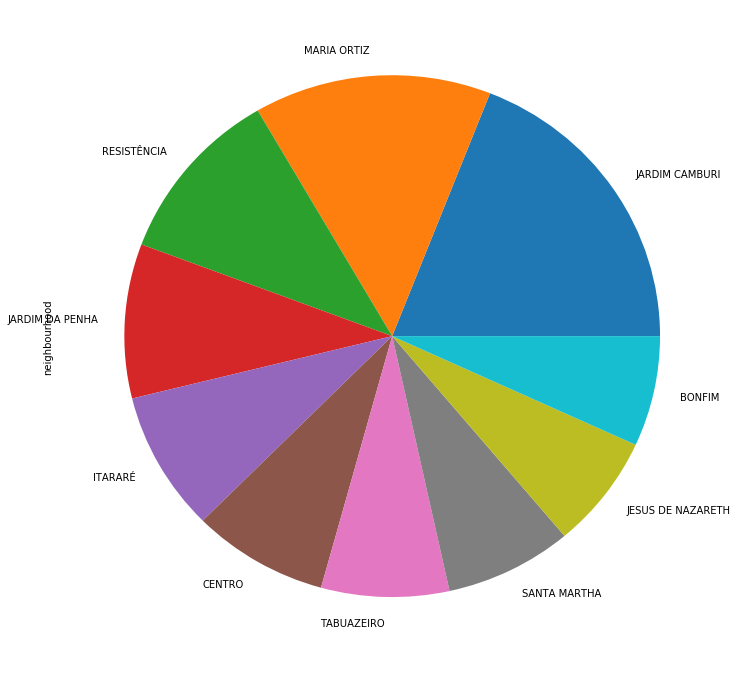

In [317]:
data_copied['neighbourhood'].value_counts().sort_values(ascending = False).head(10).plot(kind='pie', figsize=(12,12))

- The most frequent neighbourhood is 'JARDIM CAMBURI' with 7717 corresponding frequency 

### Research Question 5 (What's the ratio of patients suffering from hipertension, diabetes, alcoholism and handicap ?)

In [280]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [281]:
# Find out the ratio of patients with different kinds of disease
hiper = data_copied['hiper_tension'].sum()/data_copied['hiper_tension'].count()
diab = data_copied['diabetes'].sum()/data_copied['diabetes'].count()
alcohol = data_copied['alcoholism'].sum()/data_copied['alcoholism'].count()
hand = data_copied['handicap'].sum()/data_copied['handicap'].count()


In [282]:
print(hiper, diab, alcohol, hand)

0.196831266768 0.0716046697121 0.0303821332753 0.0185084475382


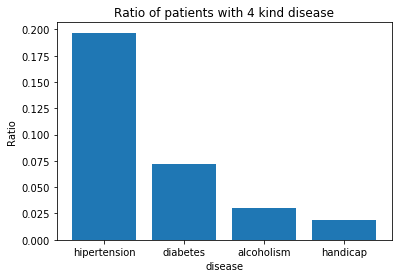

In [283]:
heights = [hiper, diab, alcohol, hand]
bars = ["hipertension", "diabetes", "alcoholism", "handicap"]
y_pos = np.arange(len(heights))
plt.bar(y_pos, heights)
plt.title("Ratio of patients with 4 kind disease")
plt.xlabel("disease")
plt.ylabel("Ratio")
plt.xticks(y_pos, bars)
plt.show()

- By far Most patients were suffering from hipertension 

### Research Question 6 (What's the ratio of male and female patients suffering from hipertension, diabetes, alcoholism and handicap ?)

In [284]:
data_copied.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [285]:
# Creat a function for statistical calculation 

def count_func(dataset = pd.DataFrame(), feature  = ""):
    male = dataset.query('gender == "M" ')
    female = dataset.query('gender == "F" ')
    filtered_male = male[feature].sum()/male[feature].count()
    filtered_female = female[feature].sum()/female[feature].count()
    return filtered_male, filtered_female



In [286]:
male_count_ht, female_count_ht = count_func(dataset = data_copied, feature = "hiper_tension")

male_count_d, female_count_d = count_func(dataset = data_copied, feature = "diabetes")

male_count_a, female_count_a = count_func(dataset = data_copied, feature = "alcoholism")

male_count_hc, female_count_hc = count_func(dataset = data_copied, feature = "handicap")

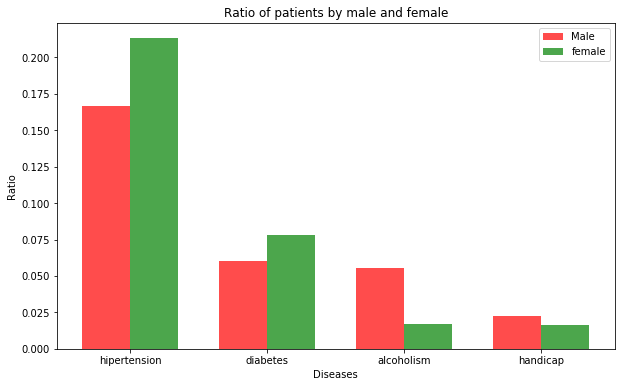

In [287]:
x2 = [male_count_ht, male_count_d, male_count_a, male_count_hc]
y2 = [female_count_ht, female_count_d, female_count_a, female_count_hc]

ind = np.arange(len(x2))
width = 0.35

plt.figure(figsize=(10,6))
male_chart = plt.bar(ind, x2, width, color='r', alpha=.7, label='Male')
female_chart = plt.bar(ind + width, y2, width, color='g', alpha=.7, label='female')

# title and labels
plt.ylabel('Ratio')
plt.xlabel('Diseases')
plt.title('Ratio of patients by male and female')
locations = ind + width / 2  # xtick locations
labels = ['hipertension', 'diabetes', 'alcoholism', 'handicap']  # xtick labels
plt.xticks(locations, labels)
#plt.subplots(figsize=(20, 10))
#plt.xticks(rotation=90);

# legend
plt.legend();
plt.show()


- the female patients were suffering from hipertension more than the male patients as well as diabetes
- The male patients were suffering from alcoholism and handicap more the the female patients 
 

### Research Question 7 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

In [288]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [289]:
# Convert no_show values to int for statistics 
data_copied['no_show'].replace(['Yes'], 0, inplace= True)
data_copied['no_show'].replace(['No'], 1, inplace= True)

In [290]:
# The relation between the neighbourhood and the noshow 

neighbour_relation= data_copied.groupby(['neighbourhood'])['no_show'].sum()/data_copied.groupby(['neighbourhood'])['no_show'].count()

In [291]:
neighbour_relation

neighbourhood
AEROPORTO              0.875000
ANDORINHAS             0.769401
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
BELA VISTA             0.797788
BENTO FERREIRA         0.774269
BOA VISTA              0.814103
BONFIM                 0.801805
CARATOÍRA              0.769891
CENTRO                 0.789489
COMDUSA                0.819355
CONQUISTA              0.811543
CONSOLAÇÃO             0.827762
CRUZAMENTO             0.782546
DA PENHA               0.806335
DE LOURDES             0.844371
DO CABRAL              0.842294
DO MOSCOSO             0.776156
DO QUADRO              0.834123
ENSEADA DO SUÁ         0.777778
ESTRELINHA             0.804104
FONTE GRANDE           0.781525
FORTE SÃO JOÃO         0.816834
FRADINHOS              0.813953
GOIABEIRAS             0.804006
GRANDE VITÓRIA         0.797386
GURIGICA               0.774034
HORTO                  0.760000
ILHA DAS CAIEIRAS      0.779756
                         .

In [292]:
# Get the 10 neighbourhood with high ratio 
neighbour_relation = neighbour_relation.nlargest(n=10)
neighbour_relation

neighbourhood
PARQUE INDUSTRIAL    1.000000
ILHA DO BOI          0.914286
AEROPORTO            0.875000
MÁRIO CYPRESTE       0.854447
SOLON BORGES         0.852878
DE LOURDES           0.844371
DO CABRAL            0.842294
SANTA MARTHA         0.842274
JARDIM DA PENHA      0.837035
DO QUADRO            0.834123
Name: no_show, dtype: float64

In [293]:
neighbour_relation.index

Index(['PARQUE INDUSTRIAL', 'ILHA DO BOI', 'AEROPORTO', 'MÁRIO CYPRESTE',
       'SOLON BORGES', 'DE LOURDES', 'DO CABRAL', 'SANTA MARTHA',
       'JARDIM DA PENHA', 'DO QUADRO'],
      dtype='object', name='neighbourhood')

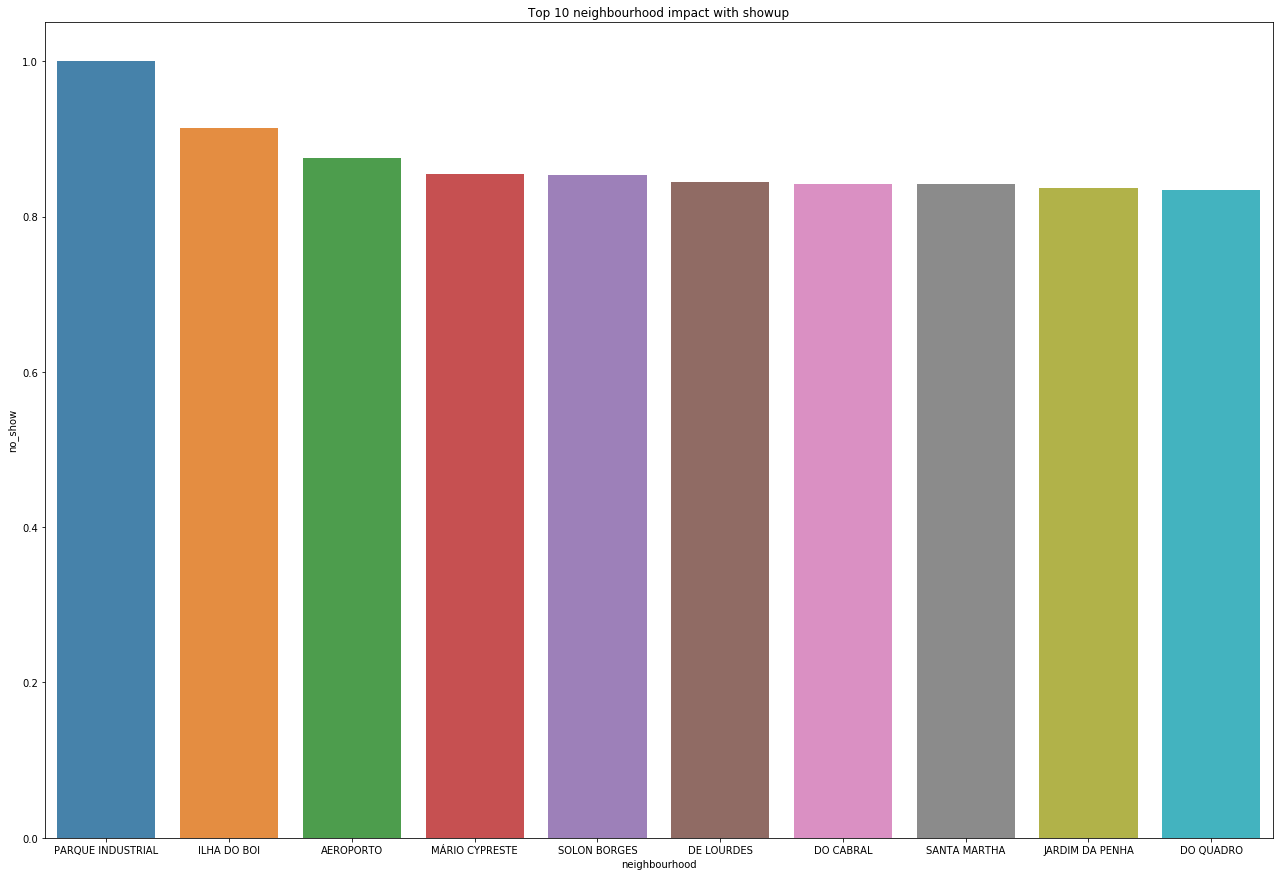

In [294]:
# Plot the neighbourhood relation with showup 

plt.subplots(figsize=(22,15))
plt.title("Top 10 neighbourhood impact with showup")
sns.barplot(neighbour_relation.index, neighbour_relation, alpha= 0.9)

- The neighbourhood has impact on showup , patients from 'PARQUE INDUSTRIAL' had made 100% show up , next is 'ILHA DO BOI' with around 91.4%.

In [295]:
# Find out the gender relation in the showip 
male_gender_relation = data_copied.query('gender == "M"')
female_gender_relation = data_copied.query('gender == "F"')

In [296]:
male_showup = male_gender_relation.groupby(['gender'])['no_show'].sum()/male_gender_relation.groupby(['gender'])['no_show'].count()
female_showup = female_gender_relation.groupby(['gender'])['no_show'].sum()/female_gender_relation.groupby(['gender'])['no_show'].count()

In [297]:
print(male_showup, female_showup)

gender
M    0.800244
Name: no_show, dtype: float64 gender
F    0.796908
Name: no_show, dtype: float64


In [298]:
male_showup.tolist()

[0.8002435422442159]

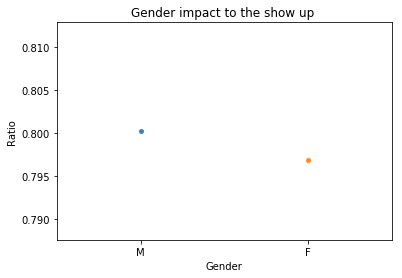

In [299]:
# Plot the result
x_gender  = ["M", "F"]
y_gender = [male_showup.tolist()[0], female_showup.tolist()[0]]

plt.xlabel("Gender")
plt.title("Gender impact to the show up ")
plt.ylabel("Ratio")

sns.swarmplot(x=x_gender, y=y_gender, alpha=0.9)

- Male gender has 80% show up and the Female gender has 79% , The gender has slight impact on the show up 

In [300]:
# Remove the (-1) age value 
data_copied.query('age == -1 ')



,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


In [301]:
data_copied.drop(data.index[[99832]], inplace = True)

In [302]:
# Find out the relation between the age and the showup 

age_relation = data_copied.groupby(['age'])['no_show'].sum()/data_copied.groupby(['age'])['no_show'].count()


In [303]:
data_copied.iloc[99832]

patient_id                 8.21657e+14
appointment_id                 5755740
gender                               F
scheduled_day      2016-06-01 07:38:12
appointment_day    2016-06-01 00:00:00
age                                 27
neighbourhood              RESISTÊNCIA
scholar_ship                         1
hiper_tension                        0
diabetes                             0
alcoholism                           0
handicap                             0
sms_received                         0
no_show                              1
Name: 100009, dtype: object

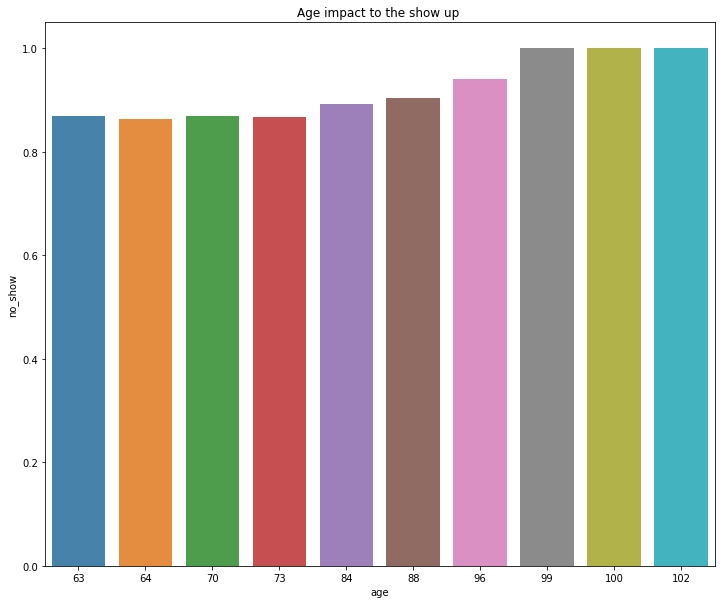

In [304]:
age_relation = age_relation.nlargest(n = 10)

plt.subplots(figsize=(12,10))
plt.title("Age impact to the show up ")
sns.barplot(age_relation.index, age_relation, alpha= 0.9)

- Age has slight impact on the showup 

In [305]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [306]:
# Find out relation between the having scholarship and showup

scholar_relation = data_copied.groupby(['scholar_ship'])['no_show'].sum()/data_copied.groupby(['scholar_ship'])['no_show'].count()
scholar_relation


scholar_ship
0    0.801968
1    0.762335
Name: no_show, dtype: float64

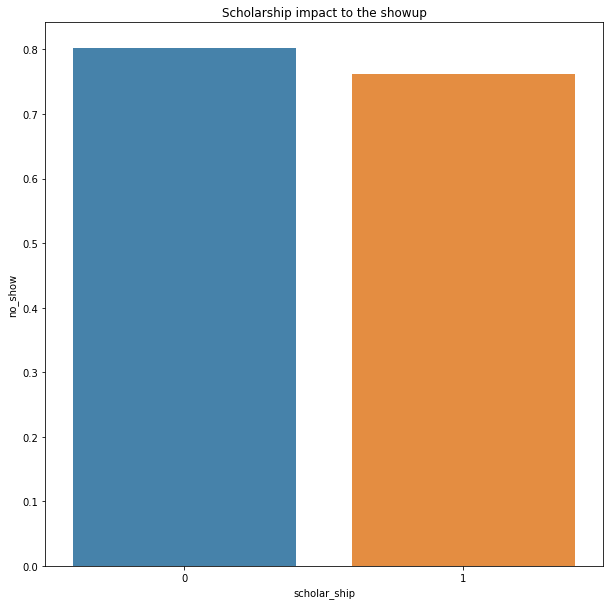

In [308]:
plt.subplots(figsize=(10,10))
plt.title("Scholarship impact to the showup")
sns.barplot(scholar_relation.index, scholar_relation, alpha = 0.9)

- patients that don't have scholarship have showed up in appointments with 80% more the the patients that have scolarship with 76% 

In [309]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholar_ship,hiper_tension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [310]:
# Find out the relation between the 4 disease and the showup 

hiper_relation = data_copied.groupby(['hiper_tension'])['no_show'].sum()/data_copied.groupby(['hiper_tension'])['no_show'].count()
diab_relation = data_copied.groupby(['diabetes'])['no_show'].sum()/data_copied.groupby(['diabetes'])['no_show'].count()
alcohol_relation = data_copied.groupby(['alcoholism'])['no_show'].sum()/data_copied.groupby(['alcoholism'])['no_show'].count()
hand_relation = data_copied.groupby(['handicap'])['no_show'].sum()/data_copied.groupby(['handicap'])['no_show'].count()




In [311]:
hiper_relation

hiper_tension
0    0.790884
1    0.827408
Name: no_show, dtype: float64

In [312]:
diab_relation

diabetes
0    0.796382
1    0.820000
Name: no_show, dtype: float64

In [313]:
alcohol_relation

alcoholism
0    0.798056
1    0.798628
Name: no_show, dtype: float64

In [314]:
hand_relation

handicap
0    0.797645
1    0.820764
Name: no_show, dtype: float64

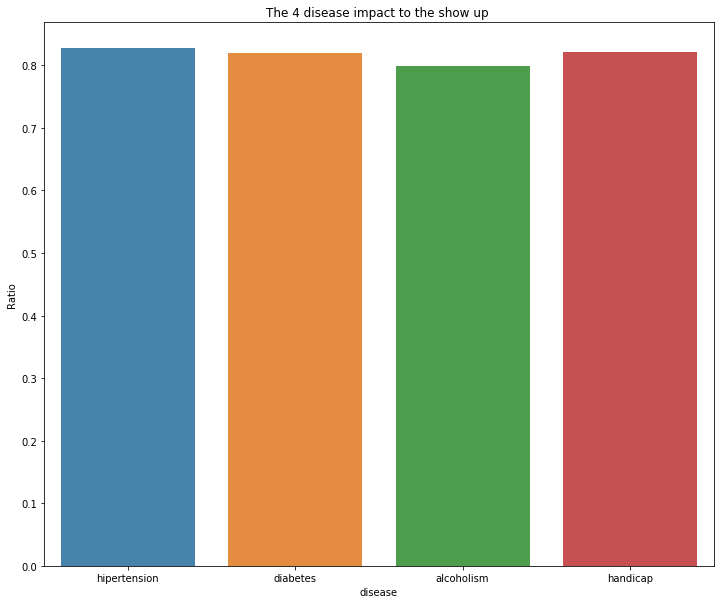

In [315]:
# Plot 4 disease chart for patients that showed up

x = ['hipertension', 'diabetes', 'alcoholism', 'handicap']
y = [hiper_relation.tolist()[1], diab_relation.tolist()[1], alcohol_relation.tolist()[1], hand_relation.tolist()[1]]

plt.subplots(figsize=(12,10))
plt.title("The 4 disease impact to the show up ")
plt.xlabel("disease")
plt.ylabel("Ratio")
sns.barplot(x, y, alpha=0.9)

- patients suffering from hipertension had 82.7% showed up percentage , least patients in show up those who were suffering from alcoholism with 79.8 %  

<a id='conclusions'></a>
## Conclusions

In this study, agood amount of analysis has been carried out and detailed instructions were given and interpretions was also provided afterwards,the most surprisingly is that old patients have showed up to the appointment more than young patients, (showing up increase with the age), the scholarship relation also is asurprise, as patients that don't have scholarship showed up more than patients that do have scholarship, also neighbourhood has great impact as patients from PARQUE INDUSTRIAL had made 100% show up which incredible, and about the disease most of patients had suffering from hypertension.
Tha dataset included information of patients from only 2016 which is substantial but also limited to only one year,The data didn't include any NAN or duplicated values though it need a little clean for columns names and values.



In [318]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0